# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# Load Dataset

In [3]:
df = pd.read_csv(
    r"Telco_customer_churn.csv"
)


In [4]:
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


# BASIC DATA UNDERSTANDING

In [6]:
df.shape


(7043, 33)

In [7]:
df.columns


Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [15]:
df.isnull().sum()


CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

### Dataset Overview
The dataset contains customer demographic details, service usage information, billing details, and churn-related variables. Initial inspection was performed to understand the structure, data types, and presence of missing values before proceeding with any data cleaning.


# TARGET VARIABLE ANALYSIS

In [19]:
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [21]:
df['Churn Label'].value_counts(normalize=True)*100

Churn Label
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

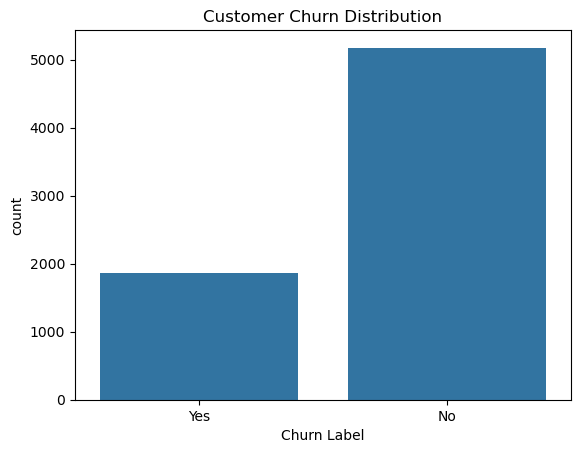

In [23]:
sns.countplot(x='Churn Label',data=df)
plt.title('Customer Churn Distribution')
plt.show()

### Target Variable Analysis
The target variable 'Churn Label' indicates whether a customer has churned or not. 
Initial analysis shows that the dataset is moderately imbalanced, with a higher proportion of non-churned customers (~73%). 
This will be considered during model evaluation by focusing on metrics like recall and F1-score.


# DATA CLEANING

In [27]:
# Replace balnk spaces with NaN
df['Total Charges'] = df['Total Charges'].replace(' ' , np.nan)

# Convert to float
df['Total Charges'] = df['Total Charges'].astype(float)

In [29]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [31]:
# Drop ONLY invalid Total Charges rows 
df.dropna(subset=['Total Charges'], inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   Count              7032 non-null   int64  
 2   Country            7032 non-null   object 
 3   State              7032 non-null   object 
 4   City               7032 non-null   object 
 5   Zip Code           7032 non-null   int64  
 6   Lat Long           7032 non-null   object 
 7   Latitude           7032 non-null   float64
 8   Longitude          7032 non-null   float64
 9   Gender             7032 non-null   object 
 10  Senior Citizen     7032 non-null   object 
 11  Partner            7032 non-null   object 
 12  Dependents         7032 non-null   object 
 13  Tenure Months      7032 non-null   int64  
 14  Phone Service      7032 non-null   object 
 15  Multiple Lines     7032 non-null   object 
 16  Internet Service   7032 non-n

### Data Cleaning Summary
The 'Total Charges' column contained blank string values which were replaced with NaN and converted to float. 
Rows with invalid total charges were removed selectively to maintain data integrity. 
Missing values in 'Churn Reason' were retained as they are only applicable to churned customers. 
This ensures the dataset is clean and ready for feature engineering and modeling.


# FEATURE SELECTION & ENCODING

In [37]:
df_ml = df.drop(columns=['CustomerID','Count','Country','State','City','Zip Code','Lat Long',
    'Churn Reason','Churn Score','CLTV','Churn Value'
])


In [39]:
categorical_cols = df_ml.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Churn Label') 

numerical_cols = df_ml.select_dtypes(include=['int64','float64']).columns.tolist()


In [41]:
df_ml = pd.get_dummies(df_ml, columns=categorical_cols, drop_first=True)

In [43]:
df_ml['Churn Label'] = df_ml['Churn Label'].map({'No':0,'Yes':1})


In [45]:
df_ml.info()
df_ml.head()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Latitude                                7032 non-null   float64
 1   Longitude                               7032 non-null   float64
 2   Tenure Months                           7032 non-null   int64  
 3   Monthly Charges                         7032 non-null   float64
 4   Total Charges                           7032 non-null   float64
 5   Churn Label                             7032 non-null   int64  
 6   Gender_Male                             7032 non-null   bool   
 7   Senior Citizen_Yes                      7032 non-null   bool   
 8   Partner_Yes                             7032 non-null   bool   
 9   Dependents_Yes                          7032 non-null   bool   
 10  Phone Service_Yes                       7032 non-null   bool   
 

,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Label,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,33.964131,-118.272783,2,53.85,108.15,1,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1,34.059281,-118.307420,2,70.70,151.65,1,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False
2,34.048013,-118.293953,8,99.65,820.50,1,False,False,False,True,...,False,True,False,True,False,False,True,False,True,False
3,34.062125,-118.315709,28,104.80,3046.05,1,False,False,True,True,...,False,True,False,True,False,False,True,False,True,False
4,34.039224,-118.266293,49,103.70,5036.30,1,True,False,False,True,...,False,True,False,True,False,False,True,False,False,False


In [47]:
# Separate features and target
X = df.drop('Churn Label' , axis=1)
y = df['Churn Label']

In [49]:
 # Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [51]:
# Check shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 32), (1407, 32), (5625,), (1407,))

In [54]:
print(X_train.shape)
print(X_test.shape)

(5625, 32)
(1407, 32)


# Machine Learning Model Training


In [57]:
# import model

from sklearn.linear_model import LogisticRegression

In [59]:
model = LogisticRegression(max_iter=1000)

In [68]:
# Reload original data fresh
df = pd.read_csv("Telco_customer_churn.csv")

# Drop useless columns
drop_cols = [
    'CustomerID','Count','Country','State','City','Zip Code',
    'Lat Long','Latitude','Longitude','Churn Score','CLTV','Churn Reason'
]
df.drop(columns=drop_cols, inplace=True)

# Convert Total Charges to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Drop any rows with NaN
df.dropna(inplace=True)

# Convert target to binary
df['Churn Label'] = df['Churn Label'].map({'Yes':1, 'No':0})

# One-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Split
X = df.drop('Churn Label', axis=1)
y = df['Churn Label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

# Model Evaluation

In [71]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]


In [73]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [75]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[1033    0]
 [   0  374]]


In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407



In [79]:
X.columns


Index(['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Gender_Male', 'Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'Phone Service_Yes', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No internet service',
       'Online Backup_Yes', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No internet service',
       'Tech Support_Yes', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Streaming Movies_No internet service',
       'Streaming Movies_Yes', 'Contract_One year', 'Contract_Two year',
       'Paperless Billing_Yes', 'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')

In [81]:
df.drop(columns=['Churn Value'], inplace=True)


In [83]:
X = df.drop('Churn Label_Yes', axis=1)
y = df['Churn Label_Yes']


KeyError: "['Churn Label_Yes'] not found in axis"

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [87]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [89]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1033
           1       1.00      1.00      1.00       374

    accuracy                           1.00      1407
   macro avg       1.00      1.00      1.00      1407
weighted avg       1.00      1.00      1.00      1407



In [91]:
import pandas as pd

df = pd.read_csv("Telco_customer_churn.csv")


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [97]:
drop_cols = [
    'CustomerID','Count','Country','State','City','Zip Code',
    'Lat Long','Latitude','Longitude',
    'Churn Score','Churn Value','CLTV','Churn Reason'
]
df.drop(columns=drop_cols, inplace=True)


In [99]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df.dropna(inplace=True)


In [103]:
df['Churn'] = df['Churn Label'].map({'Yes':1, 'No':0})
df.drop(columns=['Churn Label'], inplace=True)


In [105]:
df = pd.get_dummies(df, drop_first=True)


In [107]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [111]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


C:\Users\parsh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [113]:
from sklearn.preprocessing import StandardScaler


In [115]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [117]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=2000)

In [119]:
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8052594171997157
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1033
           1       0.64      0.60      0.62       374

    accuracy                           0.81      1407
   macro avg       0.75      0.74      0.75      1407
weighted avg       0.80      0.81      0.80      1407



# Improve Model Performance

In [122]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [124]:
model = LogisticRegression(max_iter=2000, class_weight='balanced')
model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=2000)

In [126]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407



# Final Model Evaluation

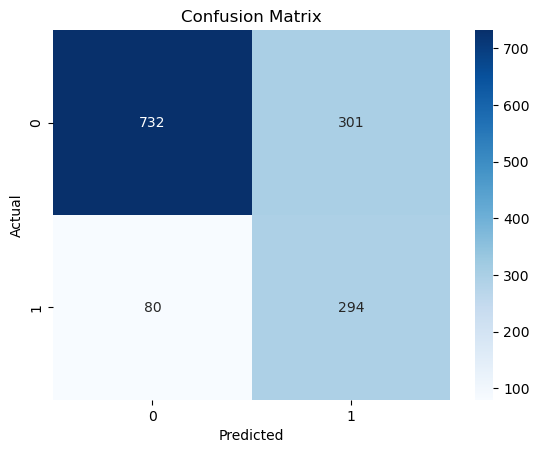

In [129]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [131]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

feature_importance.head(10)


,Feature,Coefficient
2,Total Charges,0.606898
10,Internet Service_Fiber optic,0.588467
21,Streaming TV_Yes,0.216265
23,Streaming Movies_Yes,0.209137
28,Payment Method_Electronic check,0.191547
9,Multiple Lines_Yes,0.185039
26,Paperless Billing_Yes,0.116447
5,Partner_Yes,0.108860
17,Device Protection_Yes,0.038215
8,Multiple Lines_No phone service,0.028775


# Model Improvement

In [134]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


C:\Users\parsh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [136]:
num_cols = ['Tenure Months', 'Monthly Charges', 'Total Charges']


In [138]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [140]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [142]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7292110874200426
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407

[[732 301]
 [ 80 294]]


# Random Forest for Customer Churn Prediction

In [147]:


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Logistic Regression
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:,1]

# 2️⃣ Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:,1]

# 3️⃣ Evaluation Metrics
def evaluate_model(name, y_true, y_pred, y_proba):
    print(f"=== {name} Evaluation ===")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_proba))
    print("\n" + "-"*50 + "\n")

evaluate_model("Logistic Regression", y_test, y_pred_lr, y_pred_proba_lr)
evaluate_model("Random Forest", y_test, y_pred_rf, y_pred_proba_rf)

# 4️⃣ Compare and choose best model
recall_lr = recall_score(y_test, y_pred_lr)
recall_rf = recall_score(y_test, y_pred_rf)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

if recall_rf > recall_lr:
    best_model = rf_model
    best_model_name = "Random Forest"
else:
    best_model = lr_model
    best_model_name = "Logistic Regression"

print(f"✅ Best Model Selected: {best_model_name}")

# 5️⃣ Feature Importance (for Random Forest only)
if best_model_name == "Random Forest":
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    print("\n=== Random Forest Feature Importance ===")
    print(feature_importance)
    
    # Plot
    plt.figure(figsize=(10,6))
    plt.barh(feature_importance['Feature'], feature_importance['Importance'])
    plt.gca().invert_yaxis()
    plt.title("Random Forest Feature Importance")
    plt.show()


=== Logistic Regression Evaluation ===
Confusion Matrix:
 [[732 301]
 [ 80 294]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.71      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407

Recall: 0.786096256684492
ROC-AUC: 0.842609656729012

--------------------------------------------------

=== Random Forest Evaluation ===
Confusion Matrix:
 [[795 238]
 [ 92 282]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      1033
           1       0.54      0.75      0.63       374

    accuracy                           0.77      1407
   macro avg       0.72      0.76      0.73      1407
weighted avg       0.80      0.77      0.78      1407

Recall: 0.7540106951871658
ROC-AUC

In [149]:
import pickle

# Save Logistic Regression
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

# Save Random Forest
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


In [151]:
# Load Logistic Regression
with open('lr_model.pkl', 'rb') as f:
    lr_model = pickle.load(f)

# Load Random Forest
with open('rf_model.pkl', 'rb') as f:
    rf_model = pickle.load(f)


In [153]:
# Save cleaned data
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


In [155]:
import pandas as pd
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')


In [1]:
!pip freeze > requirements.txt
